# **Task 5 - Exploratory Data Analysis - Sports**
This task is part of the internship with The Sparks Foundation. And the task is as a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

# **Author : Disha Dutta**

**Importing all the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files

**Loading the datasets**

In [2]:
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv


In [3]:
dt1 = pd.read_csv('deliveries.csv')

In [4]:
dt1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
uploaded = files.upload()

Saving matches.csv to matches.csv


In [6]:
dt2 = pd.read_csv('matches.csv')

In [7]:
dt2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Data Inspection**

In [8]:
# concise summary of the DataFrame
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
# concise summary of the DataFrame
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
# set of field definitions and related metadata
dt1.shape

(179078, 21)

In [11]:
# set of field definitions and related metadata
dt2.shape

(756, 18)

In [12]:
#Summary statistics of matches data
dt1.describe(include = 'all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


In [13]:
#Summary statistics of deliviries data
dt2.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2017-04-08,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [14]:
dt1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [15]:
dt2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Data Visualisation**

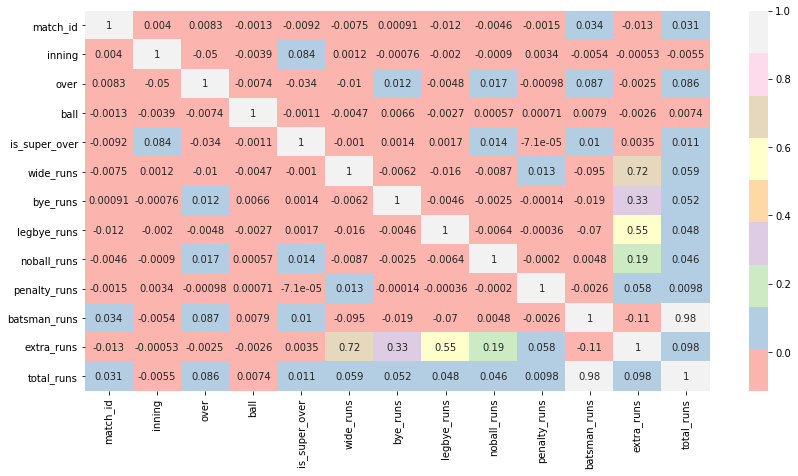

In [16]:
# pairwise correlation of columns in the dataframe
corr = dt1.corr()
fig, ax = plt.subplots(figsize=(14,7))  
sns.heatmap(corr,annot=True,cmap='Pastel1')

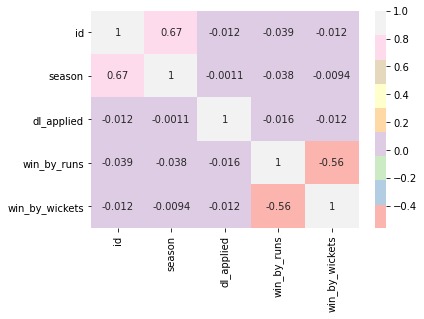

In [17]:
# pairwise correlation of columns in the dataframe
corr = dt2.corr() 
sns.heatmap(corr,annot=True,cmap='Pastel1')

Data Analysing

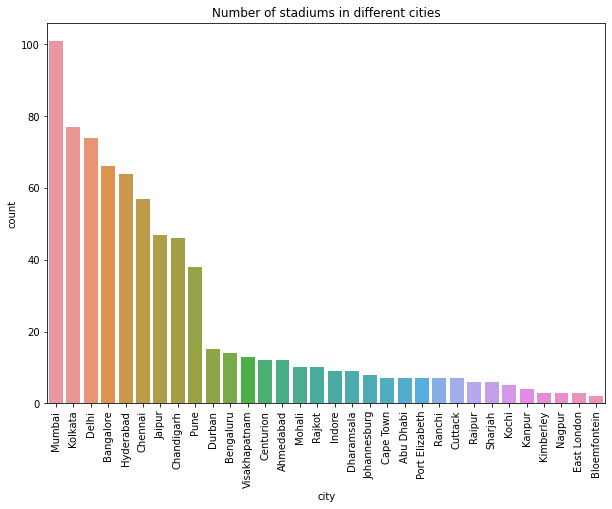

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x="city", data=dt2, order = dt2["city"].value_counts(['venue']).index)
plt.xticks(rotation=90)
plt.title("Number of stadiums in different cities")
plt.show()

Mumbai has the most number of stadiums

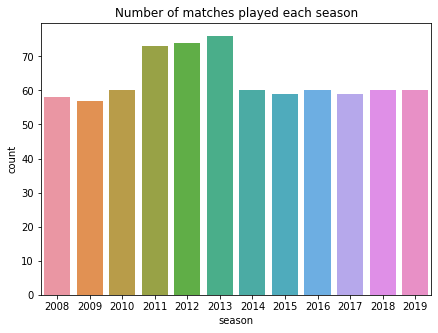

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='season', data = dt2)
plt.title("Number of matches played each season")
plt.ylabel("count")
plt.xlabel("season")
plt.show()

In season 2013, most number of matches were played

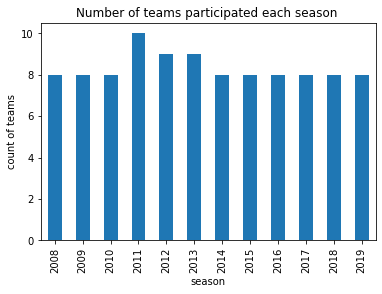

In [20]:
dt2.groupby('season')['team1'].nunique().plot(kind = 'bar')
plt.title("Number of teams participated each season ")
plt.ylabel("count of teams")
plt.xlabel("season")
plt.show()

Maximum number of teams participated in season 2011

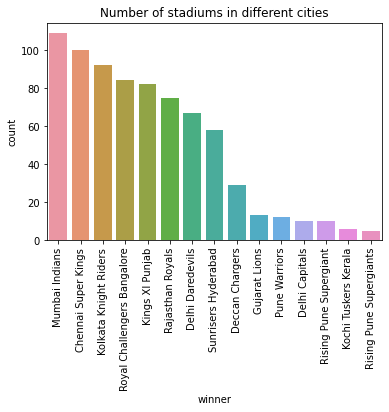

In [21]:
sns.countplot(x="winner", data=dt2, order = dt2["winner"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of stadiums in different cities")
plt.show()

Mumbai Indians won highest number of matches

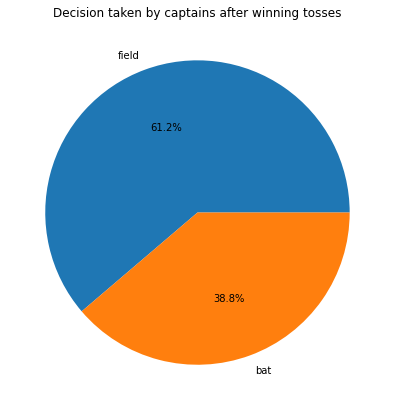

In [22]:
plt.figure(figsize=(10,7))
plt.title('Decision taken by captains after winning tosses')
plt.pie(dt2['toss_decision'].value_counts(),labels=dt2['toss_decision'].value_counts().index,autopct='%1.1f%%')
plt.show()

Most of the Captains chose to field first after winning the toss

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


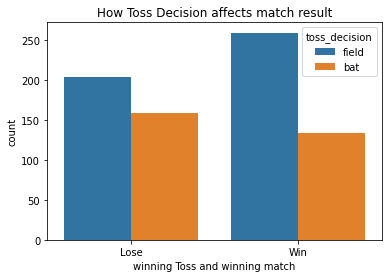

In [23]:
dt2['toss_win_game_win'] = np.where((dt2.toss_winner == dt2.winner),'Win','Lose')
sns.countplot('toss_win_game_win', data=dt2, hue = 'toss_decision')
plt.title("How Toss Decision affects match result")
plt.xlabel("winning Toss and winning match")
plt.show()

Teams winning tosses and electng to field first have won most number of times.

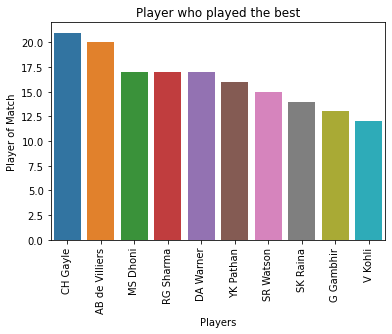

In [24]:
sns.countplot(x="player_of_match", data=dt2, order = dt2["player_of_match"].value_counts()[:10].index)
plt.xticks(rotation=90)
plt.title("Player who played the best")
plt.xlabel("Players")
plt.ylabel("Player of Match")
plt.show()

CH Gayle has so far won the most number of Player of Match awards

In [25]:
#merging deliveries and matches datasets
play = pd.merge(dt1,dt2, left_on='match_id', right_on ='id')
play.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_game_win
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Lose
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Lose


Text(0, 0.5, 'Total Runs Scored')

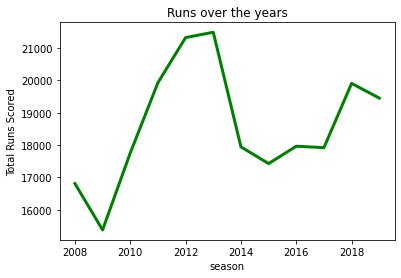

In [26]:
play.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, color = 'green')
plt.title("Runs over the years")
plt.xlabel("season")
plt.ylabel("Total Runs Scored")

Runs scored have been inceased at an fast pace from seassions 2009 to 2013 and then it again gradually decreases and increases

Text(0, 0.5, 'Runs Scored')

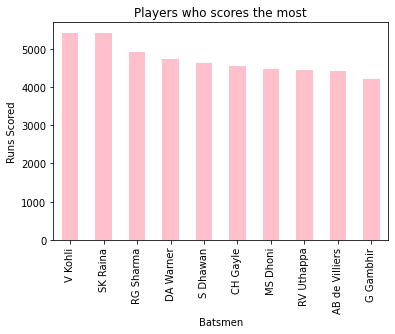

In [27]:
play.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color='pink')
plt.title("Players who scores the most")
plt.xlabel("Batsmen")
plt.ylabel("Runs Scored")

SK Sharma have found to score the most runs

Text(0, 0.5, 'Wickets Taken')

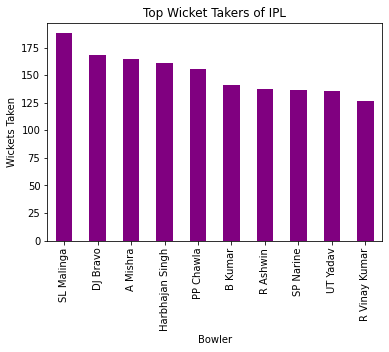

In [28]:
play.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'purple')
plt.title("Top Wicket Takers of IPL")
plt.xlabel("Bowler")
plt.ylabel("Wickets Taken")

SL Malinga took the most number of wickets

# **Conclusion -**

    •	Mumbai has the most number of stadiums
    •	In season 2013, most number of matches were played
    •	Maximum number of teams participated in season 2011
    •	Mumbai Indians won highest number of matches
    •	Most of the Captains chose to field first after winning the toss
    •	Teams winning tosses and electng to field first have won most number of times.
    •	CH Gayle has so far won the most number of Player of Match awards
    •	Runs scored have been inceased at an fast pace from seassions 2009 to 2013 and then it again gradually decreases and increases
    •	SK Sharma have found to score the most runs
    •	SL Malinga took the most number of wickets
